# ML Fundamentals

## Linear Regression

### From Scratch

In [221]:
import numpy as np
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt

In [222]:
def gradient_descent(X, y, W, alpha=0.01, epochs=500):
    """
    X: examples
    y: ground truth outputs
    W: weights
    alpha: learning rate
    epochs: num iterations
    """
    n = len(X)
    losses = []
    for i in range(epochs):
        W = W - (alpha/n) * X.T @ (X@W-y) # gradient update with learning rate and loss derivative w.r.t W
        losses.append(mse(X@W, y))
    return (losses, W)

In [223]:
def mse(y_hat, y):
    return np.sum((y_hat-y)**2)/(2*len(y)) # dividing by 2 cancels out 2 in derivative; remember to sum

In [224]:
def normalize(X):
    mu = np.mean(X, 0)
    sigma = np.std(X, 0)
    return (X-mu) / sigma

In [225]:
dataset = load_boston()
X = normalize(dataset.data) # normalize data to be centered around mean=0 and stdev=1
X = np.hstack((np.ones((len(y), 1)), X)) # add intercept: y = w_1*x_1 + b, where b is w_2*1
y = dataset.target[:, None] # 'None' adds a dimension; same as np.newaxis
W = np.zeros(X.shape[-1])[:, None]

X.shape, W.shape, y.shape # X.shape[-1] would have been 13 before adding intercept; same with W.shape[0]

((506, 14), (14, 1), (506, 1))

In [226]:
losses, W = gradient_descent(X, y, W) # toss the weights because we aren't using them

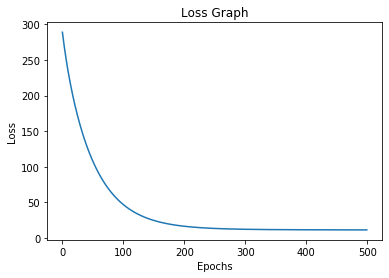

In [227]:
plt.plot(range(len(losses)), losses)
plt.title("Loss Graph")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

### Using Scikit-Learn 

In [213]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [218]:
dataset = load_boston()
X = dataset.data
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

In [215]:
model = LinearRegression().fit(X_train, y_train)
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
train_score, test_score # coef of determination or R^2; percent variation in dependent explained by independent

(0.7508856358979673, 0.6687594935356329)

In [266]:
model.predict(X_test)[:10]

array([28.99672362, 36.02556534, 14.81694405, 25.03197915, 18.76987992,
       23.25442929, 17.66253818, 14.34119   , 23.01320703, 20.63245597])

## Logistic Regression

### From Scratch

In [ ]:
import numpy as np
from skl